# Load Data

In [1]:
import pandas as pd
import numpy as np

### FOMC Rates

In [2]:
rates = pd.read_csv('inputs/Raw_Data/FOMC_rates.csv')

In [3]:
rates

,﻿Date,Increase,Decrease,Tgt_level
0,12/17/15,25,0,0.25-0.50
1,12/15/16,25,0,0.50-0.75
2,3/16/17,25,0,0.75-1.00
3,6/15/17,25,0,1.00-1.25
4,12/14/17,25,0,1.25-1.50
5,3/22/18,25,0,1.50-1.75
6,6/14/18,25,0,1.75-2.00
7,9/27/18,25,0,2.00-2.25
8,12/20/18,25,0,2.25-2.50
9,8/1/19,0,25,2.00-2.25


Source: https://www.federalreserve.gov/monetarypolicy/openmarket.htm

### Index Returns

In [4]:
sp500_ret = pd.read_csv('inputs/Raw_Data/SP500_ret.csv')

In [5]:
sp500_ret['returns'] = sp500_ret['S&P_500'].pct_change().fillna(0)

In [6]:
sp500_ret

,Effective_date,S&P_500,returns
0,1/2/15,2058.20,0.000000
1,1/5/15,2020.58,-0.018278
2,1/6/15,2002.61,-0.008893
3,1/7/15,2025.90,0.011630
4,1/8/15,2062.14,0.017888
...,...,...,...
2087,4/19/23,4154.52,-0.000084
2088,4/20/23,4129.79,-0.005953
2089,4/21/23,4133.52,0.000903
2090,4/24/23,4137.04,0.000852


Source: https://www.spglobal.com/spdji/en/indices/equity/sp-500/#overview

### Stock Trading Volume

In [7]:
stock_tv = pd.read_csv('inputs/Raw_Data/SP500_TV.csv')

In [8]:
stock_tv

,Date,Value
0,12/2/15,1088000
1,12/3/15,1379000
2,12/4/15,1308000
3,12/7/15,712744
4,12/8/15,670998
...,...,...
502,3/31/23,3293000
503,4/3/23,2494000
504,4/4/23,2687000
505,4/5/23,2311000


Source: https://ycharts.com/indicators/cboe_spx_volume

### Vbilx data

In [9]:
#pip install yfinance
import yfinance as yf
import pandas as pd
from datetime import datetime
from scipy import stats

In [10]:
start  = datetime(2015, 1, 1)
end    = datetime(2023, 4, 25)

In [11]:
stock_prices = yf.download('VBILX', start=start, end=end)

daily_returns = stock_prices['Adj Close'].pct_change().fillna(0)
daily_price = stock_prices['Adj Close']

Vbilx = pd.DataFrame({'Daily Returns': daily_returns, 'Daily Price': daily_price})

[*********************100%***********************]  1 of 1 completed


In [12]:
Vbilx

,Daily Returns,Daily Price
Date,,
2015-01-02,0.000000,9.095694
2015-01-05,0.004348,9.135239
2015-01-06,0.004330,9.174790
2015-01-07,0.000000,9.174790
2015-01-08,-0.002586,9.151061
...,...,...
2023-04-18,0.001938,10.340000
2023-04-19,-0.001934,10.320000
2023-04-20,0.003876,10.360000


### VBIRX data

In [13]:
stock_prices2 = yf.download('VBIRX', start=start, end=end)

daily_returns2 = stock_prices2['Adj Close'].pct_change().fillna(0)
daily_price2 = stock_prices2['Adj Close']

Vbirx = pd.DataFrame({'Daily Returns': daily_returns2, 'Daily Price': daily_price2})
Vbirx

[*********************100%***********************]  1 of 1 completed


,Daily Returns,Daily Price
Date,,
2015-01-02,0.000000,9.148485
2015-01-05,0.000954,9.157212
2015-01-06,0.000952,9.165927
2015-01-07,0.000951,9.174645
2015-01-08,-0.000950,9.165927
...,...,...
2023-04-18,0.000000,9.990000
2023-04-19,-0.001001,9.980000
2023-04-20,0.002004,10.000000


# Cleaning and EDA

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

### FOMC Rates

In [15]:
rates.describe().T.style.format('{:,.2f}')

,count,mean,std,min,25%,50%,75%,max
Increase,23.00,30.43,24.95,0.00,25.00,25.00,37.50,75.00
Decrease,23.00,9.78,23.52,0.00,0.00,0.00,0.00,100.00


In [16]:
rates.head().style

,﻿Date,Increase,Decrease,Tgt_level
0,12/17/15,25,0,0.25-0.50
1,12/15/16,25,0,0.50-0.75
2,3/16/17,25,0,0.75-1.00
3,6/15/17,25,0,1.00-1.25
4,12/14/17,25,0,1.25-1.50


In [17]:
# Missing values
(
    ( # these lines do the calculation - what % of missing values are there for each var
        rates.isna()      
       .sum(axis=0)     
        /len(rates)       # convert # missing to % missing 
        *100            # report as percentage
    ) 
    .sort_values(ascending=False)
    .to_frame(name='% missing') 
    .style.format("{:.3f}")     
)

,% missing
﻿Date,0.000
Increase,0.000
Decrease,0.000
Tgt_level,0.000


In [18]:
# Convert to numeric
rates['Increase'] = rates['Increase'].astype(float)
rates['Decrease'] = rates['Decrease'].astype(float)

In [19]:
print(rates.columns)

Index(['﻿Date', 'Increase', 'Decrease', 'Tgt_level'], dtype='object')


In [20]:
rates = rates.rename(columns={'\ufeffDate': 'Date'})
#reformat date
rates['Date'] = pd.to_datetime(rates['Date']).dt.strftime('%Y-%m-%d')
# Making units consistent
rates['Tgt_level'] = rates['Tgt_level'].apply(lambda x: x.replace('-', '.', 1))

In [21]:
# Outliers
rates.describe(percentiles=[.01,.05,.95,.99]).T.style.format('{:,.2f}')

,count,mean,std,min,1%,5%,50%,95%,99%,max
Increase,23.00,30.43,24.95,0.00,0.00,0.00,25.00,75.00,75.00,75.00
Decrease,23.00,9.78,23.52,0.00,0.00,0.00,0.00,47.50,89.00,100.00


This suggest that there are variables with large outliers. In the Increase column, the maximum value is 75.00, which is the 99th percentile. In the Decrease column, the maximum value is 100.00, which is also an outlier. It may be necessary to drop those observations to prevent them from skewing the results.


In [22]:
#Exploring dataset 
print(rates.dtypes)

Date          object
Increase     float64
Decrease     float64
Tgt_level     object
dtype: object


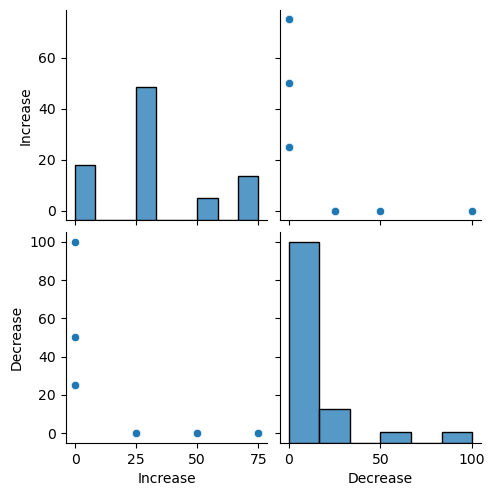

In [23]:
sns.pairplot(rates)
plt.show()

### Index Returns

In [24]:
sp500_ret.describe().T.style.format('{:,.2f}')

,count,mean,std,min,25%,50%,75%,max
S&P_500,"2,092.00","3,020.61",821.31,"1,829.08","2,280.89","2,823.48","3,810.17","4,796.56"
returns,"2,092.00",0.00,0.01,-0.12,-0.00,0.00,0.01,0.09


In [25]:
sp500_ret.head().style

,Effective_date,S&P_500,returns
0,1/2/15,2058.200000,0.000000
1,1/5/15,2020.580000,-0.018278
2,1/6/15,2002.610000,-0.008893
3,1/7/15,2025.900000,0.011630
4,1/8/15,2062.140000,0.017888


In [26]:
# adjust data 
sp500_ret = sp500_ret[1:2091]

#rename column 
sp500_ret = sp500_ret.rename(columns={'Effective_date ': 'date'})

#reformat date
sp500_ret['date'] = pd.to_datetime(sp500_ret['date'], format='%m/%d/%y').apply(lambda x: x.strftime('%Y-%m-%d'))

In [27]:
sp500_ret

,date,S&P_500,returns
1,2015-01-05,2020.58,-0.018278
2,2015-01-06,2002.61,-0.008893
3,2015-01-07,2025.90,0.011630
4,2015-01-08,2062.14,0.017888
5,2015-01-09,2044.81,-0.008404
...,...,...,...
2086,2023-04-18,4154.87,0.000855
2087,2023-04-19,4154.52,-0.000084
2088,2023-04-20,4129.79,-0.005953
2089,2023-04-21,4133.52,0.000903


In [28]:
# Missing values
(
    ( # these lines do the calculation - what % of missing values are there for each var
        sp500_ret.isna()      
       .sum(axis=0)     
        /len(sp500_ret)       # convert # missing to % missing 
        *100            # report as percentage
    ) 
    .sort_values(ascending=False)
    .to_frame(name='% missing') 
    .style.format("{:.3f}")     
)

,% missing
date,0.000
S&P_500,0.000
returns,0.000


In [29]:
# Convert to numeric
sp500_ret['S&P_500'] = pd.to_numeric(sp500_ret['S&P_500'])

In [30]:
# Outliers
sp500_ret.describe(percentiles=[.01,.05,.95,.99]).T.style.format('{:,.2f}')

,count,mean,std,min,1%,5%,50%,95%,99%,max
S&P_500,"2,090.00","3,020.57",821.11,"1,829.08","1,906.54","2,023.03","2,823.48","4,471.23","4,696.11","4,796.56"
returns,"2,090.00",0.00,0.01,-0.12,-0.03,-0.02,0.00,0.02,0.03,0.09


This suggests that there are some extreme values in the upper end of the return distribution, which are likely to be the outliers.

In [31]:
#Exploring dataset 
print(sp500_ret.dtypes)

date        object
S&P_500    float64
returns    float64
dtype: object


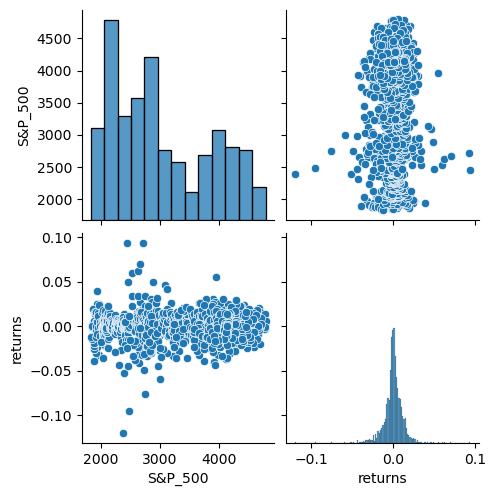

In [32]:
sns.pairplot(sp500_ret)
plt.show()

### Stock Trading Volume

In [33]:
stock_tv.describe().T.style

,count,unique,top,freq
Date,507,494,3/2/20,2
Value,507,461,1576000,3


In [34]:
stock_tv.head().style

,Date,Value
0,12/2/15,1088000
1,12/3/15,1379000
2,12/4/15,1308000
3,12/7/15,712744
4,12/8/15,670998


In [35]:
# Missing values
(
    ( # these lines do the calculation - what % of missing values are there for each var
        stock_tv.isna()      
       .sum(axis=0)     
        /len(stock_tv)       # convert # missing to % missing 
        *100            # report as percentage
    ) 
    .sort_values(ascending=False)
    .to_frame(name='% missing') 
    .style.format("{:.3f}")     
)

,% missing
Date,0.000
Value,0.000


In [36]:
# cleaning for missing data
stock_tv.dropna(inplace=True)

In [37]:
# Convert to numeric
stock_tv['Value'] = stock_tv['Value'].replace('#VALUE!', np.nan)

stock_tv['Value'] = stock_tv['Value'].astype(float)

In [38]:
# Outliers
stock_tv.describe(percentiles=[.01,.05,.95,.99]).T.style.format('{:,.2f}')

,count,mean,std,min,1%,5%,50%,95%,99%,max
Value,505.00,"1,828,502.60","724,755.14","462,036.00","672,667.84","879,416.40","1,710,000.00","3,119,200.00","3,491,680.00","4,203,000.00"


This suggests that there are extreme values in the dataset that are much larger than the typical range of values. 

In [39]:
#Exploring dataset 
print(stock_tv.dtypes)

Date      object
Value    float64
dtype: object


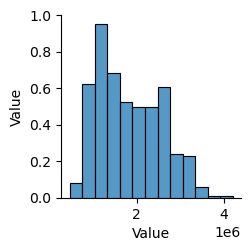

In [40]:
sns.pairplot(stock_tv)
plt.show()

### VBLIX

In [41]:
Vbilx.describe().T.style.format('{:,.2f}')

,count,mean,std,min,25%,50%,75%,max
Daily Returns,"2,091.00",0.00,0.00,-0.02,-0.00,0.00,0.00,0.02
Daily Price,"2,091.00",10.26,0.87,9.02,9.56,9.88,11.00,11.85


In [42]:
Vbilx['Date'] = pd.to_datetime(Vbilx.index, format='%Y-%m-%d')

In [43]:
#adjust dataset
Vbilx= Vbilx[1:2091]

In [44]:
Vbilx.head().style

,Daily Returns,Daily Price,Date
Date,,,
2015-01-05 00:00:00,0.004348,9.135239,2015-01-05 00:00:00
2015-01-06 00:00:00,0.004330,9.174790,2015-01-06 00:00:00
2015-01-07 00:00:00,0.000000,9.174790,2015-01-07 00:00:00
2015-01-08 00:00:00,-0.002586,9.151061,2015-01-08 00:00:00
2015-01-09 00:00:00,0.003457,9.182695,2015-01-09 00:00:00


In [45]:
# Missing values
(
    ( # these lines do the calculation - what % of missing values are there for each var
        Vbilx.isna()      
       .sum(axis=0)     
        /len(Vbilx)       # convert # missing to % missing 
        *100            # report as percentage
    ) 
    .sort_values(ascending=False)
    .to_frame(name='% missing') 
    .style.format("{:.3f}")     
)

,% missing
Daily Returns,0.000
Daily Price,0.000
Date,0.000


In [46]:
# cleaning for missing data
Vbilx.dropna(inplace=True)

/var/folders/_c/n4fjhrcn45bfs76s3p_8hn2c0000gn/T/ipykernel_39204/588264884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vbilx.dropna(inplace=True)


In [47]:
# Convert to numeric
Vbilx['Daily Returns'] = Vbilx['Daily Returns'].astype(float)

/var/folders/_c/n4fjhrcn45bfs76s3p_8hn2c0000gn/T/ipykernel_39204/3298945885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vbilx['Daily Returns'] = Vbilx['Daily Returns'].astype(float)


In [48]:
# Outliers
Vbilx.describe(percentiles=[.01,.05,.95,.99]).T.style.format('{:,.2f}')

,count,mean,std,min,1%,5%,50%,95%,99%,max
Daily Returns,"2,090.00",0.00,0.00,-0.02,-0.01,-0.01,0.00,0.00,0.01,0.02
Daily Price,"2,090.00",10.26,0.87,9.02,9.10,9.18,9.88,11.75,11.80,11.85


For daily returns, the minimum value is -0.02, which could indicate a large negative return. The 1% and 5% percentiles are also negative, which suggests that there may be some days with unusually negative returns.For daily price, the maximum value is 11.85, which is quite a bit higher than the 95% and 99% percentiles. This could indicate a day with an unusually high price.

In [49]:
#Exploring dataset 
print(Vbilx.dtypes)

Daily Returns           float64
Daily Price             float64
Date             datetime64[ns]
dtype: object


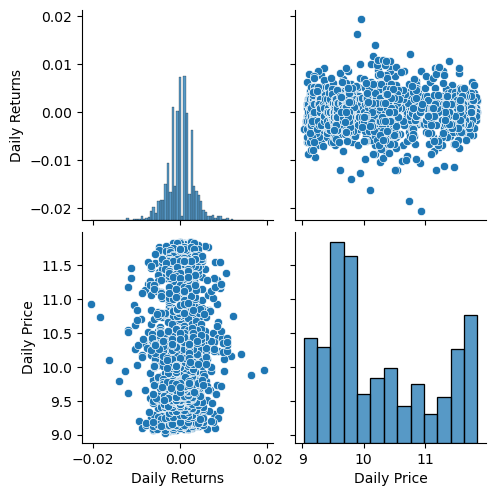

In [50]:
sns.pairplot(Vbilx)
plt.show()

### VBIRX

In [51]:
Vbirx.describe().T.style.format('{:,.2f}')

,count,mean,std,min,25%,50%,75%,max
Daily Returns,"2,091.00",0.00,0.00,-0.01,-0.00,0.00,0.00,0.01
Daily Price,"2,091.00",9.78,0.45,9.15,9.40,9.65,10.14,10.55


In [52]:
Vbirx['Date'] = pd.to_datetime(Vbirx.index, format='%Y-%m-%d')

In [53]:
Vbirx.head().style

,Daily Returns,Daily Price,Date
Date,,,
2015-01-02 00:00:00,0.000000,9.148485,2015-01-02 00:00:00
2015-01-05 00:00:00,0.000954,9.157212,2015-01-05 00:00:00
2015-01-06 00:00:00,0.000952,9.165927,2015-01-06 00:00:00
2015-01-07 00:00:00,0.000951,9.174645,2015-01-07 00:00:00
2015-01-08 00:00:00,-0.000950,9.165927,2015-01-08 00:00:00


In [54]:
# Missing values
(
    ( # these lines do the calculation - what % of missing values are there for each var
        Vbirx.isna()      
       .sum(axis=0)     
        /len(Vbirx)       # convert # missing to % missing 
        *100            # report as percentage
    ) 
    .sort_values(ascending=False)
    .to_frame(name='% missing') 
    .style.format("{:.3f}")     
)

,% missing
Daily Returns,0.000
Daily Price,0.000
Date,0.000


In [55]:
Vbirx.dropna(inplace=True)

In [56]:
# Convert to numeric
Vbirx['Daily Returns'] = Vbirx['Daily Returns'].astype(float)

In [57]:
# Outliers
Vbirx.describe(percentiles=[.01,.05,.95,.99]).T.style.format('{:,.2f}')

,count,mean,std,min,1%,5%,50%,95%,99%,max
Daily Returns,"2,091.00",0.00,0.00,-0.01,-0.00,-0.00,0.00,0.00,0.00,0.01
Daily Price,"2,091.00",9.78,0.45,9.15,9.18,9.22,9.65,10.51,10.53,10.55


The 1% and 5% percentiles for the data are 9.18 and 9.22, respectively, indicating that the majority of the data falls above these values. The 95% and 99% percentiles for the data are 10.51 and 10.53, respectively, indicating that there are some extreme values in the upper end of the data distribution.

In [58]:
#Exploring dataset 
print(Vbirx.dtypes)

Daily Returns           float64
Daily Price             float64
Date             datetime64[ns]
dtype: object


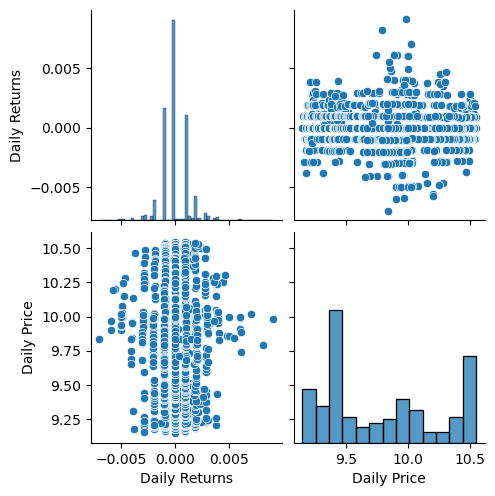

In [59]:
sns.pairplot(Vbirx)
plt.show()

## Exporting Clean Data

In [60]:
rates.to_csv('inputs/Clean_Data/Clean_Rates.csv', index=False)

In [61]:
sp500_ret.to_csv('inputs/Clean_Data/Clean_sp500_ret.csv', index=False)

In [62]:
stock_tv.to_csv('inputs/Clean_Data/Clean_stock_tv.csv', index=False)

In [63]:
Vbilx.to_csv('inputs/Clean_Data/Clean_Vbilx.csv', index=False)

In [64]:
Vbirx.to_csv('inputs/Clean_Data/Clean_Vbirx.csv', index=False)